In [212]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [213]:
import numpy as np
from matplotlib import pyplot as plt
from agents.pgp.pgp_softmax import SoftMaxPGP
from environments.gridworlds.gridworlds_classic import *
from environments.gridworlds.gridworlds_toroidal import *
from environments.gridworlds.gridactions import *
from plots.gridworlds.gridworld_visualizer import GridWorldVisualizer
from utils.policy_functions import *

In [214]:
# Agent parameters
gamma = 0.99
p0 = p0_uniform

# World parameters
action_cost = -0.1

# Initialize world and agent
# world = TorusWorld(20, 20, np.array([[(20-1) // 2, (20-1) // 2]]), term_locs= np.array([]), action_cost=action_cost)
# world = OneDoor(term_locs= np.array([]), action_cost=action_cost)
# world = FourRoom(n_square=10, term_locs= np.array([]), reward=np.array([]), action_cost=action_cost)
world = FourRoom(n_square=10, action_cost=action_cost)

gpp = SoftMaxPGP(world, gamma, p0_func=p0)
viz = GridWorldVisualizer(world, gpp)

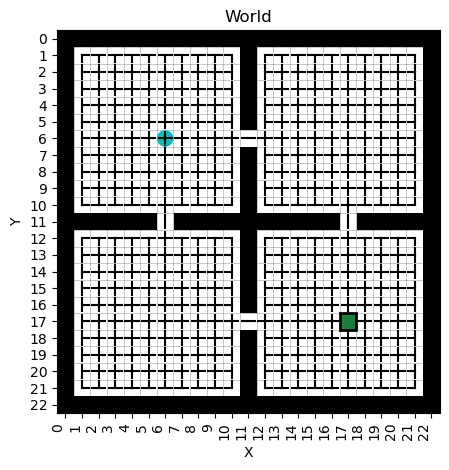

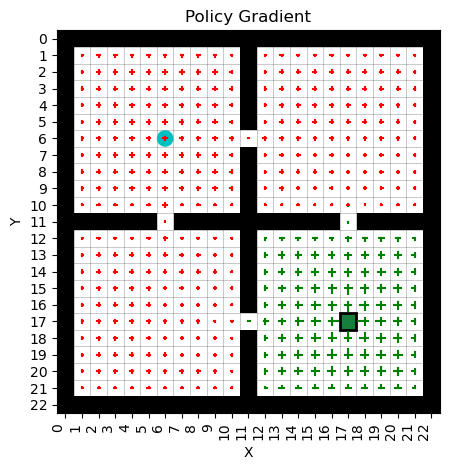

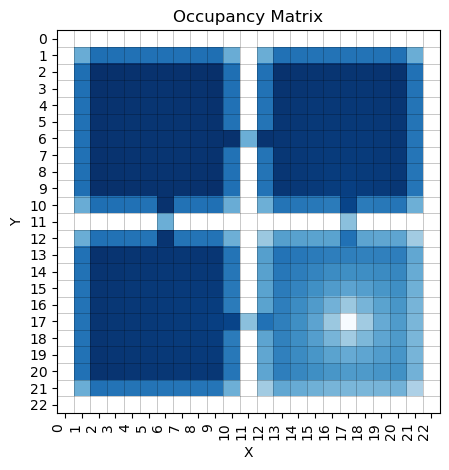

In [215]:
# Plot world
viz.plot_policy()
plt.title("World")
plt.tight_layout()
plt.show()

viz.plot_gradient(policy_gradient=True)
plt.title("Policy Gradient")
plt.tight_layout()
plt.show()

viz.plot_successor_matrix()
plt.title("Occupancy Matrix")
plt.tight_layout()
plt.show()


In [216]:
def SR2(agent):

    γ = agent.gamma
    D = agent.SR
    P = agent.env.P
    R = np.einsum("ij, ijk, ijk -> i", agent.policy_vec(), agent.env.P, agent.env.R)

    # dSR = Σ_oy  p_o ⋅ γ ⋅ D_oi ⋅ P_ijy ⋅ D_ys
    dSR = γ * np.einsum('oi, ijy, ys, s -> oij', D, P, D, R, optimize='optimal')
    dSR = np.sum(dSR, axis=2)
    dSR = dSR / np.sum(dSR, axis=1) 

    return dSR

In [217]:
def plot_eigenvalues(M, n_eig, interpolation="gaussian"):
    eigv_G, eigw_G = np.linalg.eig(M)

    idx = np.argsort(-eigv_G)[:n_eig]
    
    for n, i_eig in enumerate(idx):
        print("{}° Eigen Value = {}".format(n + 1, eigv_G[i_eig]))
        wr = eigw_G[:, i_eig].real
        wi = eigw_G[:, i_eig].imag
        plt.subplot(121)
        viz.plot_grid(wr, plot_axis=False, cmap='seismic', interpolation=interpolation, vmin=-np.max(np.abs(wr)), vmax=np.max(np.abs(wr)))
        plt.axis('off')
        plt.title("real eigVec")
        plt.subplot(122)
        viz.plot_grid(wi, plot_axis=False, cmap='seismic', interpolation=interpolation, vmin=-np.max(np.abs(wi)), vmax=np.max(np.abs(wi)))
        plt.axis('off')
        plt.title("img eigVec")
        plt.tight_layout()
        plt.show()

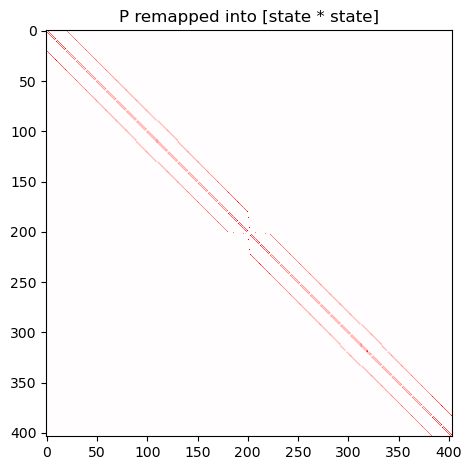

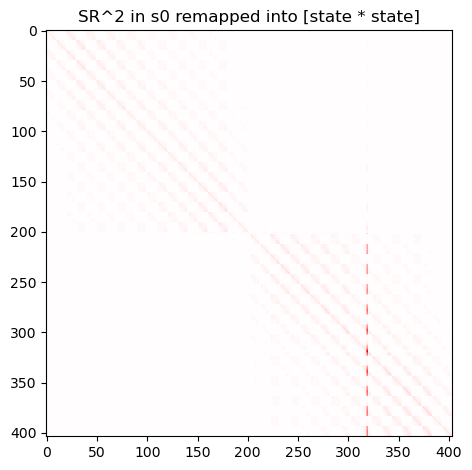

1° Eigen Value = 1.1923227003107217


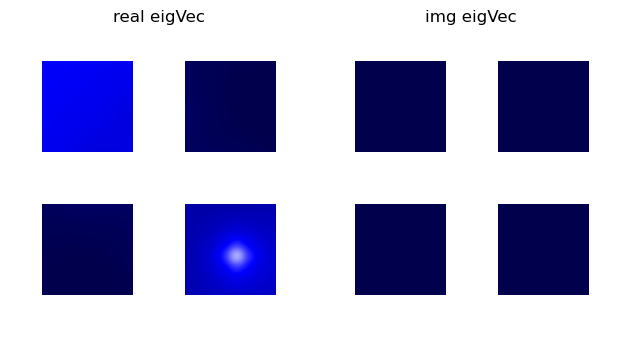

2° Eigen Value = 1.0906689184201428


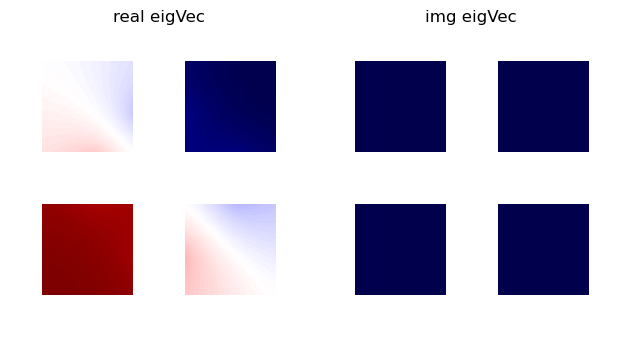

3° Eigen Value = 1.0000000000000082


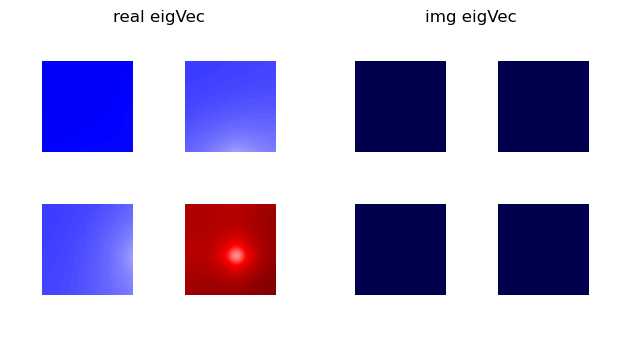

4° Eigen Value = 0.8719582386890449


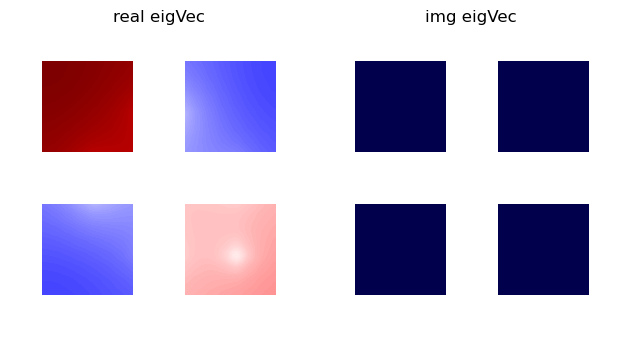

5° Eigen Value = 0.8032286815573476


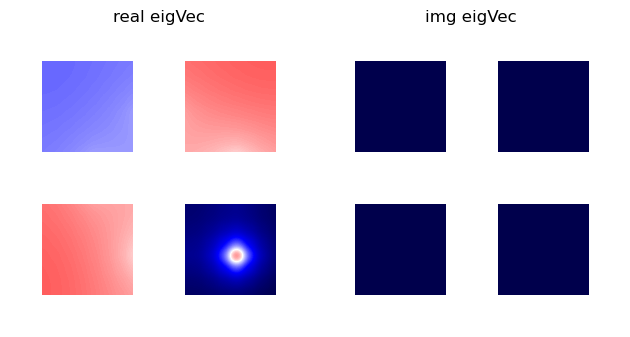

6° Eigen Value = 0.4424537410910573


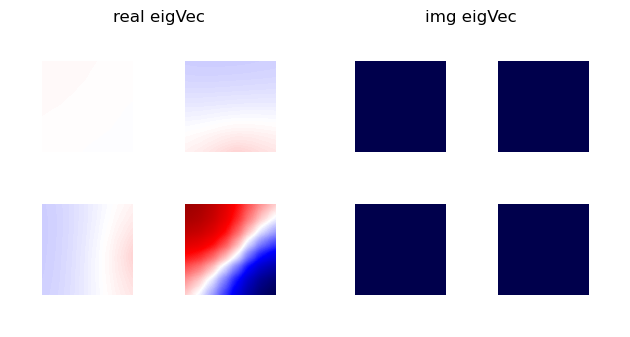

7° Eigen Value = 0.4398641258421516


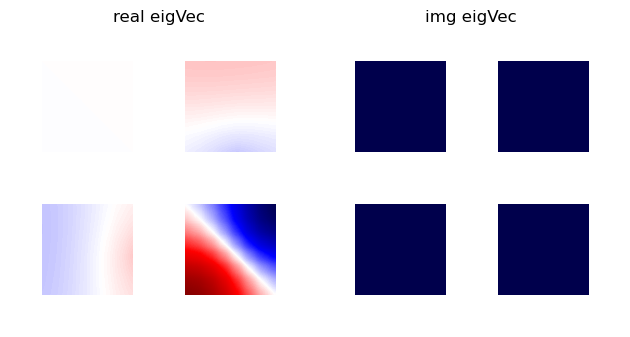

8° Eigen Value = 0.3091425278373087


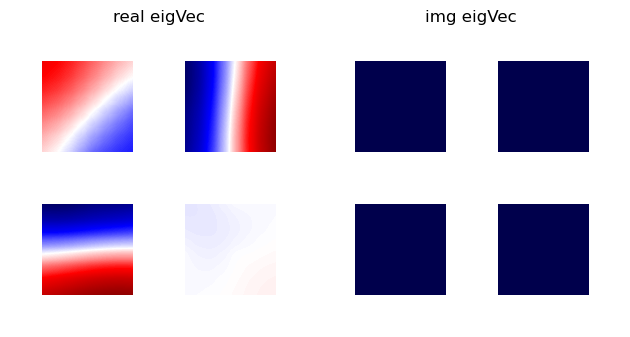

9° Eigen Value = 0.30857201691431935


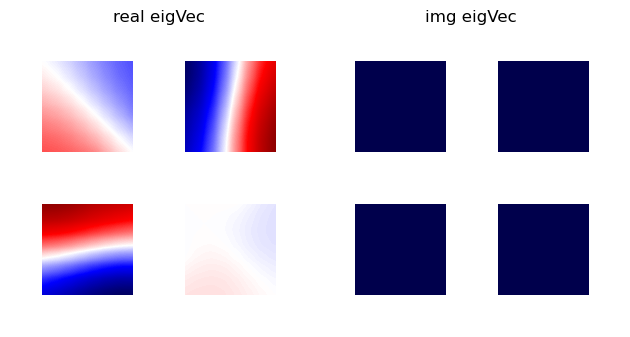

10° Eigen Value = 0.30462659372610357


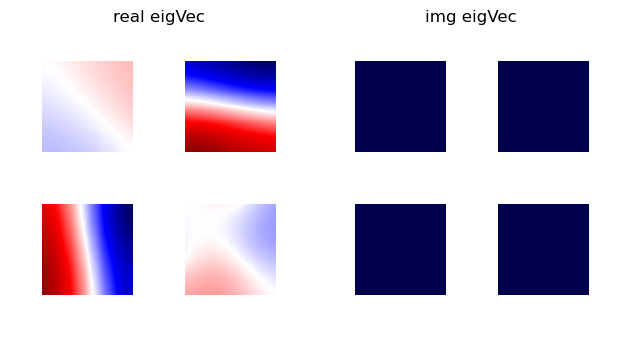

11° Eigen Value = 0.3037452854798399


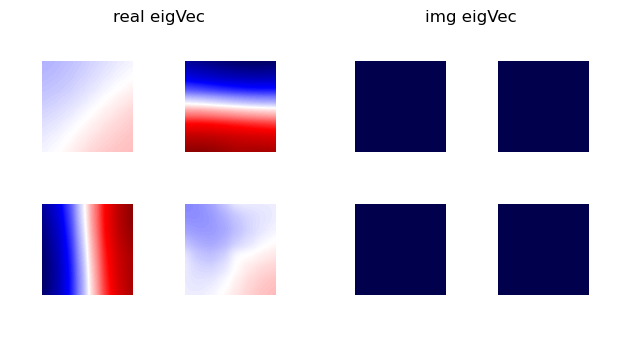

12° Eigen Value = 0.25500445564732577


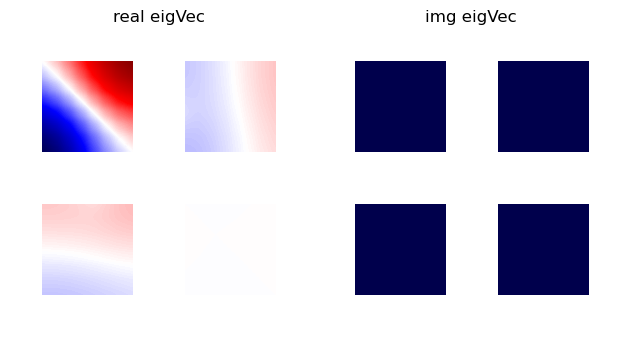

13° Eigen Value = 0.24748825784816655


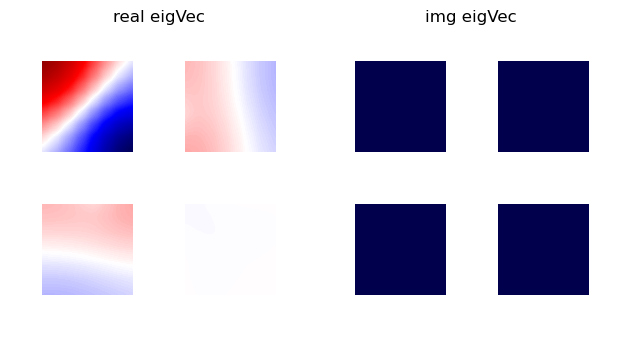

14° Eigen Value = 0.22060453510373104


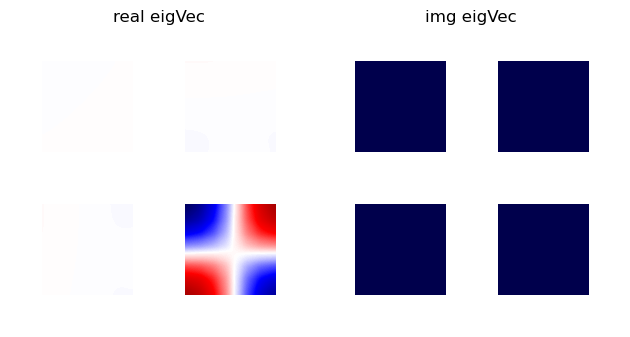

15° Eigen Value = 0.16920947159426397


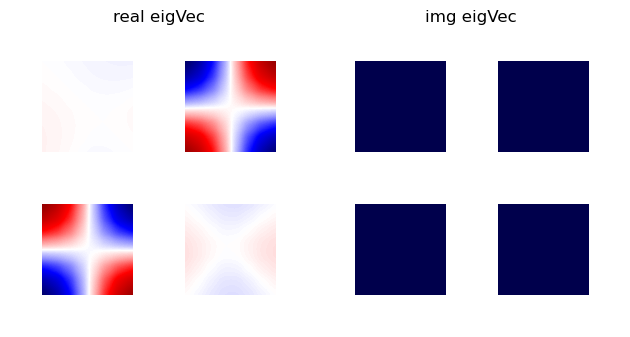

16° Eigen Value = 0.16911748311335856


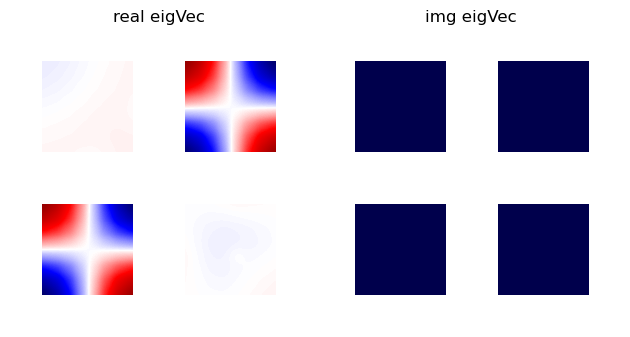

17° Eigen Value = 0.1515347249848017


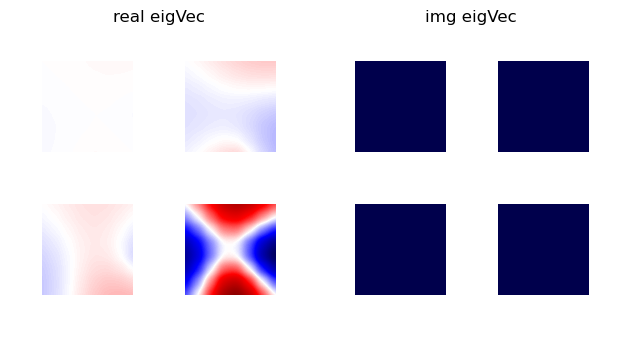

18° Eigen Value = 0.14696538091759037


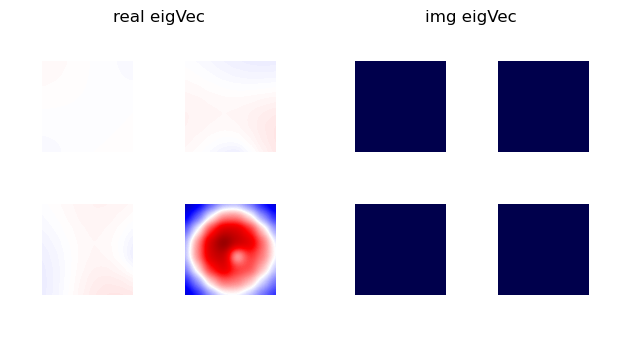

19° Eigen Value = 0.14033322567394094


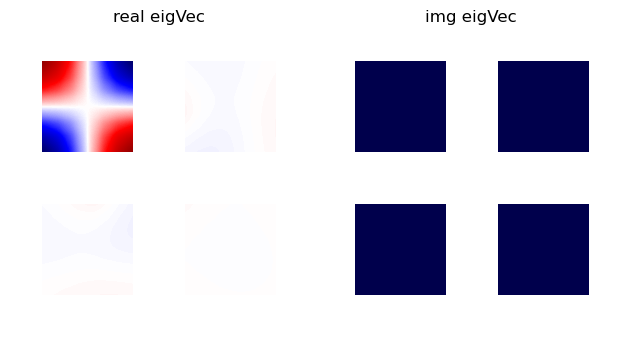

20° Eigen Value = 0.11445888417261617


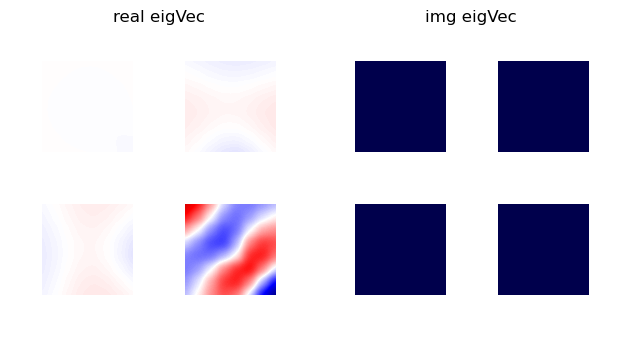

21° Eigen Value = 0.11430742020878316


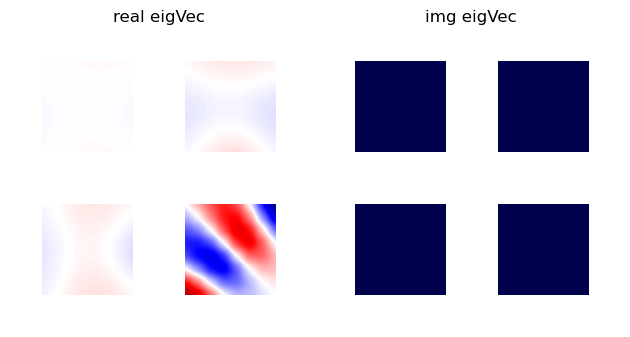

22° Eigen Value = 0.10331153108976975


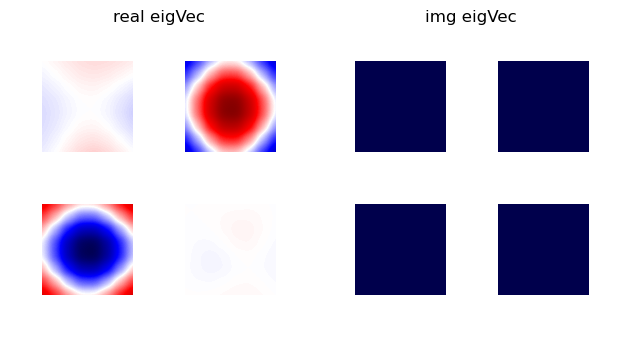

23° Eigen Value = 0.10324768597696161


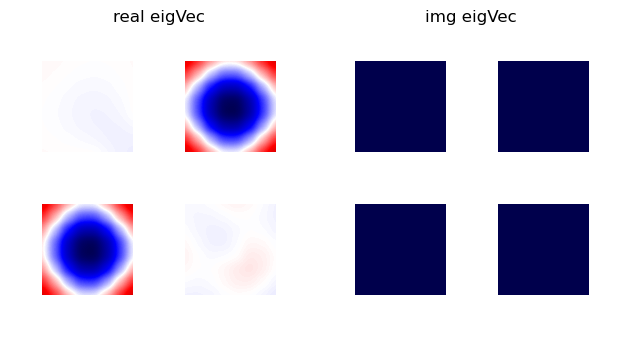

24° Eigen Value = 0.10076877477356723


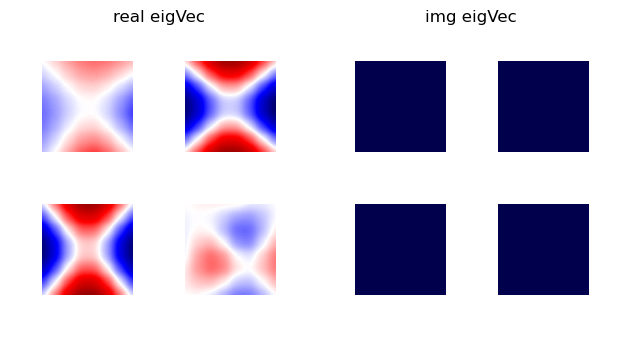

25° Eigen Value = 0.10005012768938149


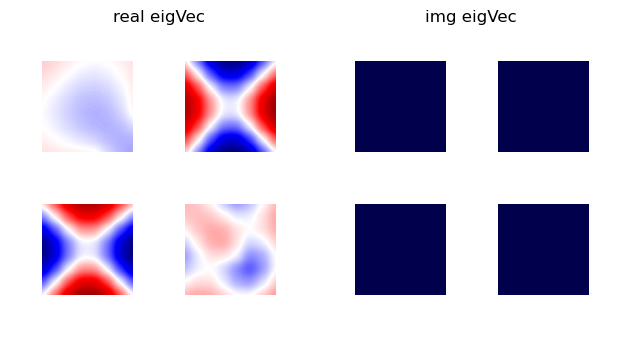

26° Eigen Value = 0.08728466001094379


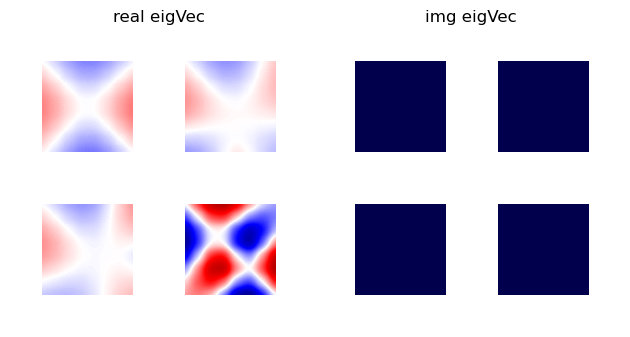

27° Eigen Value = 0.08628164392471559


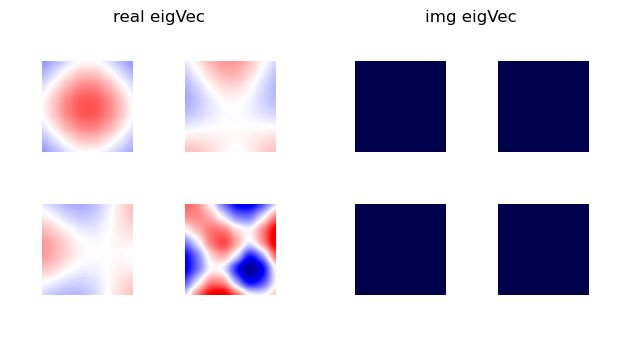

28° Eigen Value = 0.0856786807654686


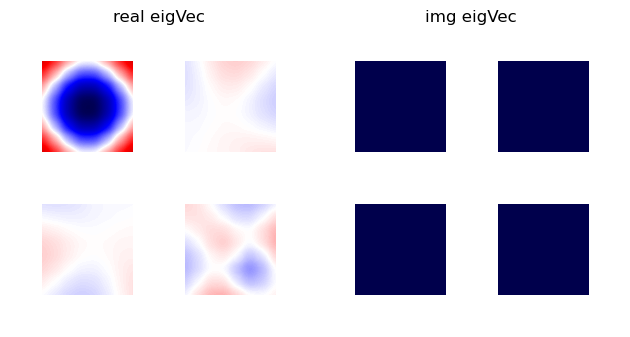

29° Eigen Value = 0.0839495995292714


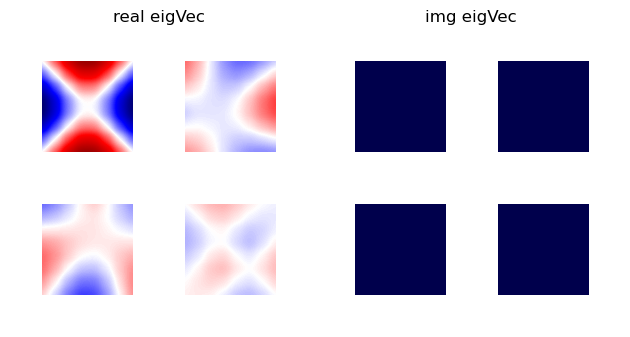

30° Eigen Value = 0.07639295790654893


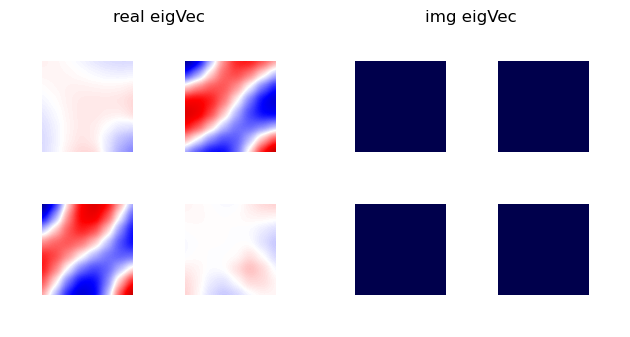

31° Eigen Value = 0.07595293143081402


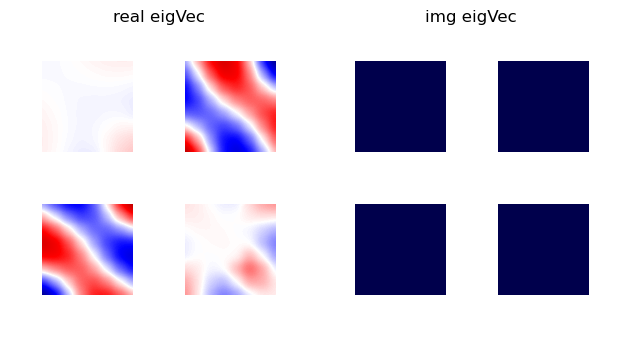

32° Eigen Value = 0.07578166186452504


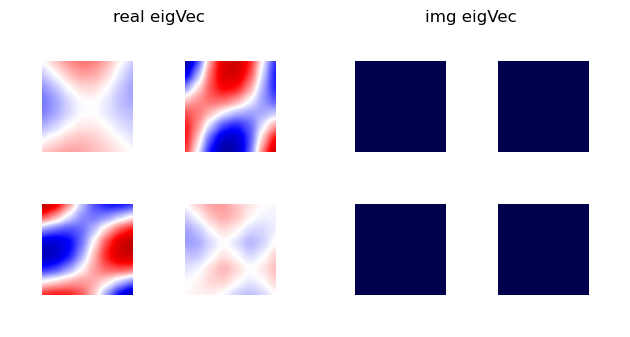

33° Eigen Value = 0.0754615815949276


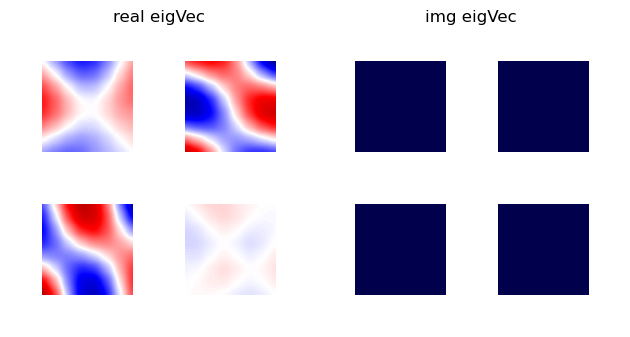

34° Eigen Value = 0.07034191068833968


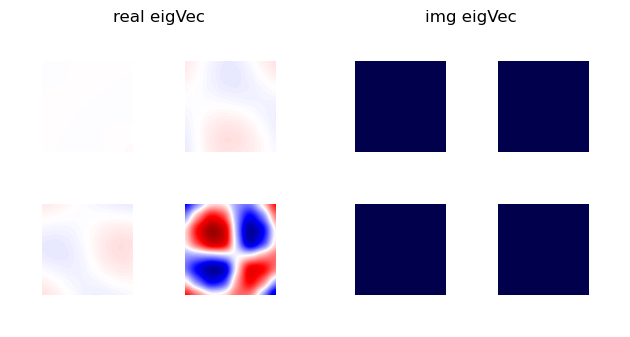

35° Eigen Value = 0.06835924137503031


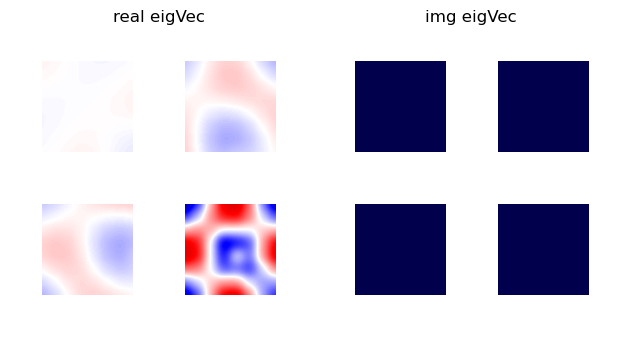

36° Eigen Value = 0.06358509097411424


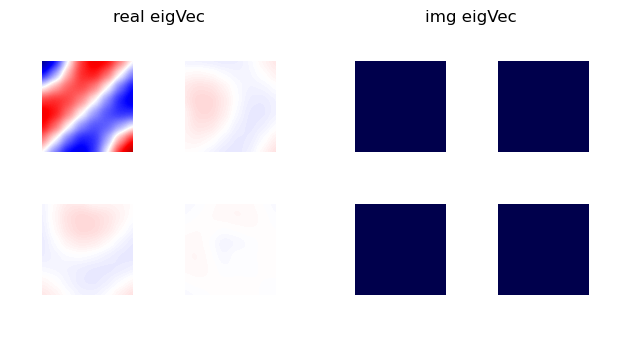

37° Eigen Value = 0.06350814392216217


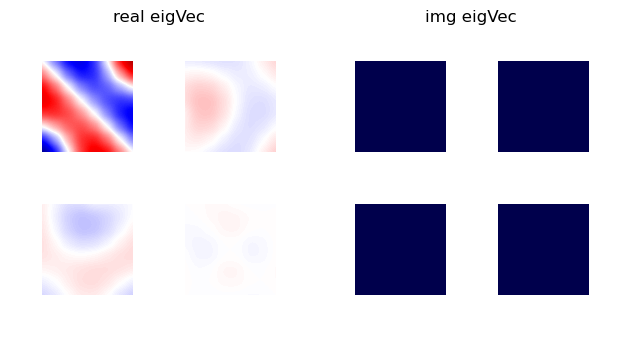

38° Eigen Value = 0.059188883851208435


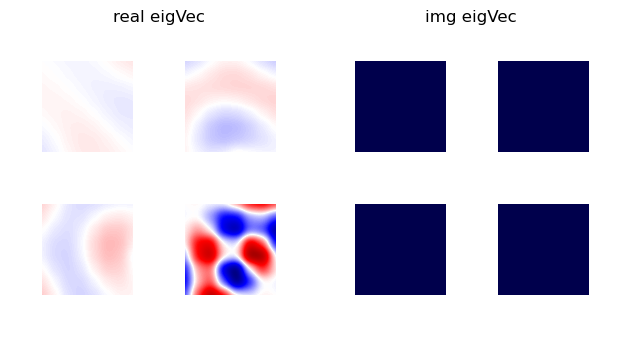

39° Eigen Value = 0.057751494593642504


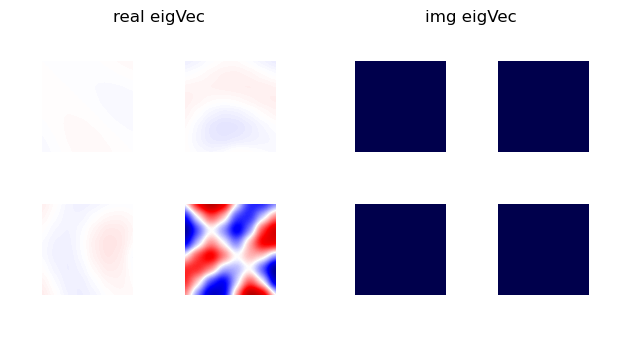

40° Eigen Value = 0.053576788557220215


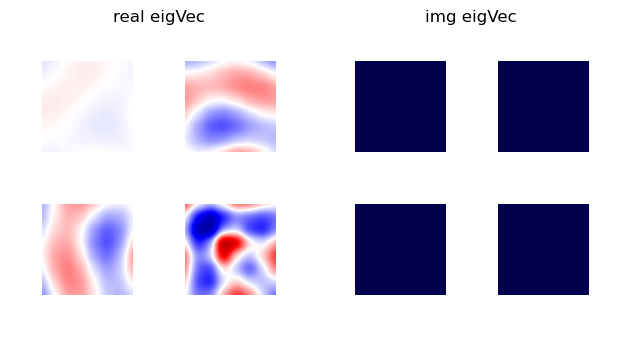

41° Eigen Value = 0.05137467208612731


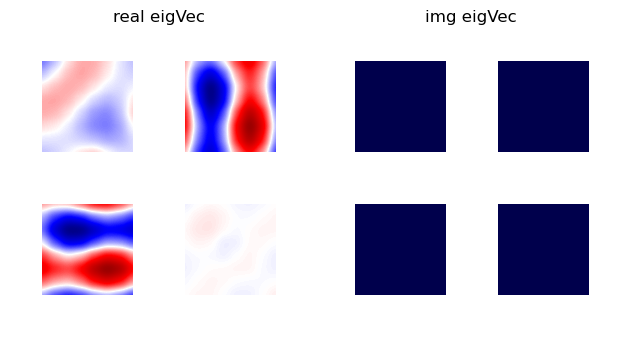

42° Eigen Value = 0.05117320363009699


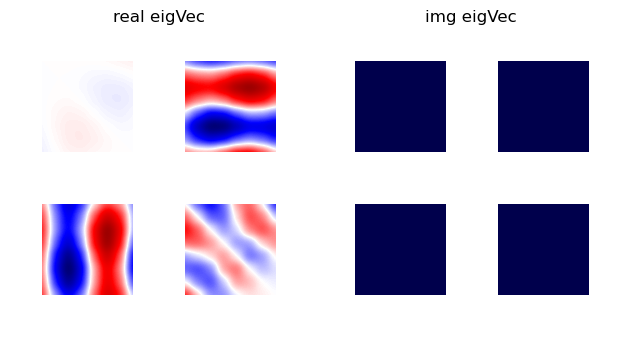

43° Eigen Value = 0.05108648751792139


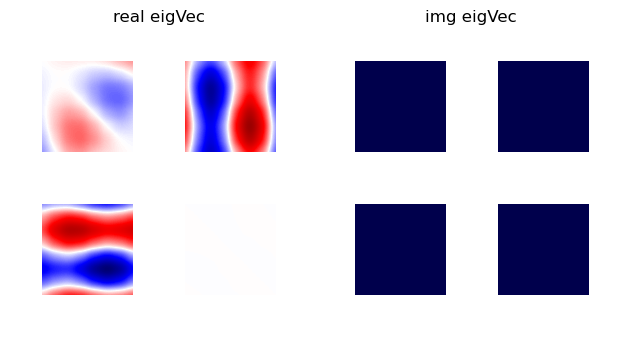

44° Eigen Value = 0.05069362614679069


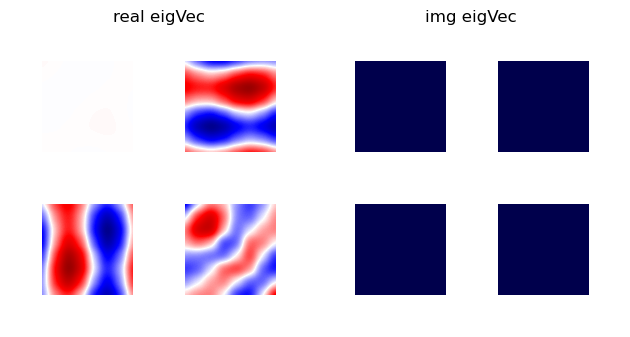

45° Eigen Value = 0.049730328861667616


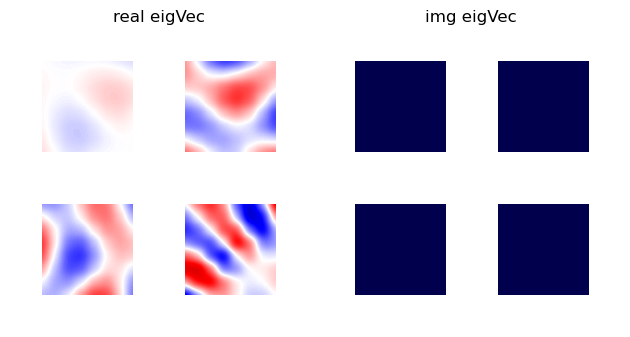

46° Eigen Value = 0.04954168457516923


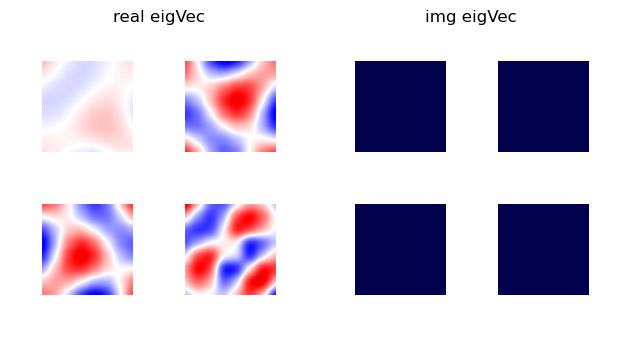

47° Eigen Value = 0.048650993763312764


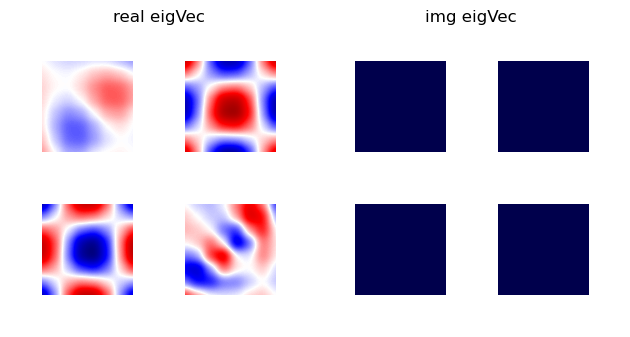

48° Eigen Value = 0.048167378515093964


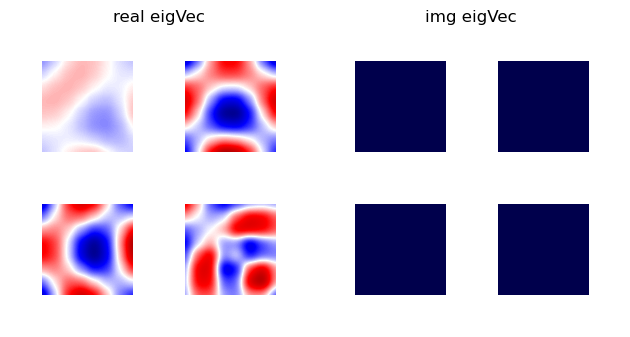

49° Eigen Value = 0.043479581038023796


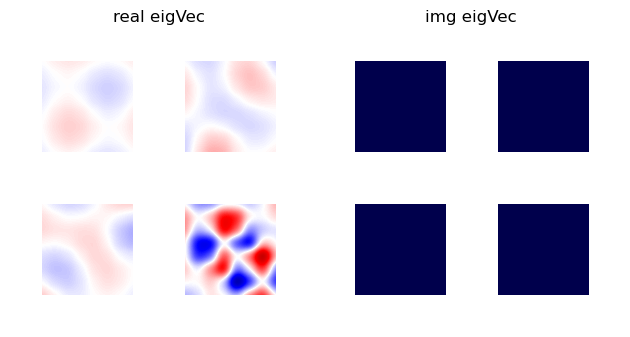

50° Eigen Value = 0.04291222659310404


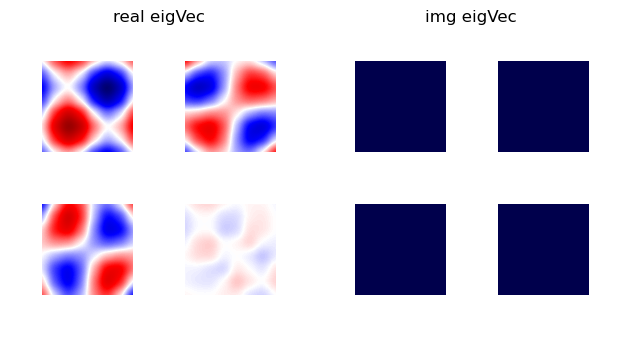

In [218]:
# Compute the gradient
gpp.reset()
sr2 = SR2(gpp)
sr = gpp.SR

# Sum over actions and normalize
P_s2s = np.sum(world.P, axis=1)
P_s2s = P_s2s / np.sum(P_s2s, axis=1) 

plt.imshow(P_s2s, cmap='seismic', vmin=-np.max(np.abs(P_s2s)), vmax=np.max(np.abs(P_s2s)))
plt.title("P remapped into [state * state]")
plt.tight_layout()
plt.show()

plt.imshow(sr2, cmap='seismic', vmin=-np.max(np.abs(sr2)), vmax=np.max(np.abs(sr2)))
plt.title("SR^2 in s0 remapped into [state * state]")
plt.tight_layout()
plt.show()

plot_eigenvalues(sr2, 50)

100%|██████████| 1000/1000 [00:06<00:00, 151.17it/s]


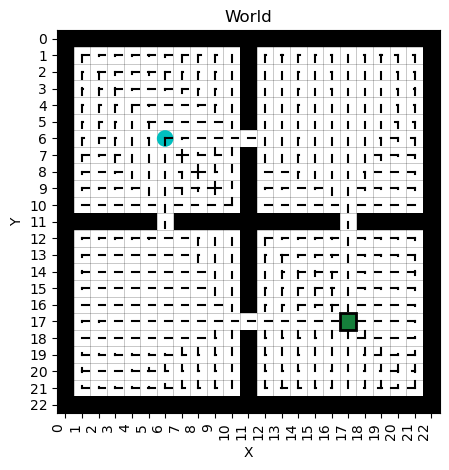

In [219]:
# Plot the eigen vectors
gpp.reset()
gpp.learn(n_steps=1000)

viz.plot_policy()
plt.title("World")
plt.tight_layout()
plt.show()


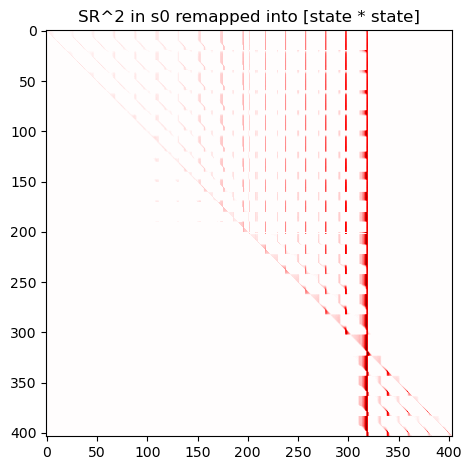

1° Eigen Value = (0.9999999999999982+0j)


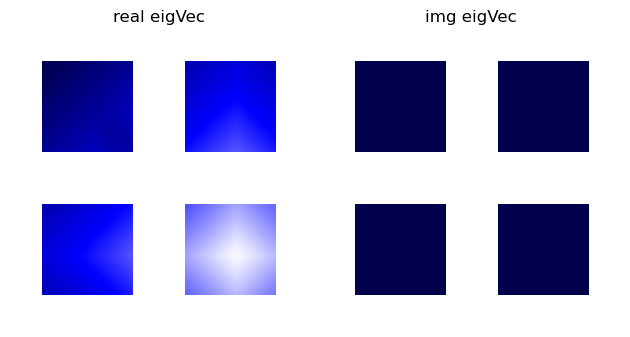

2° Eigen Value = (0.9998609978521676+0j)


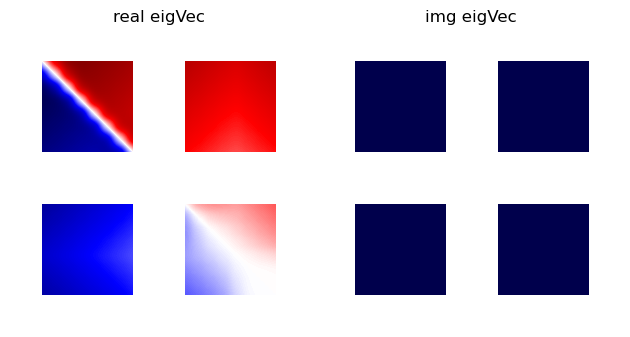

3° Eigen Value = (0.9982737261387973+0j)


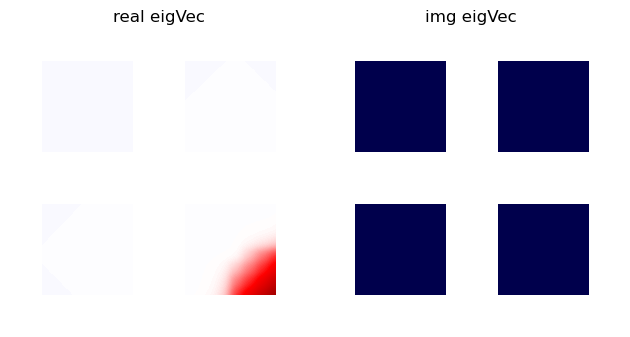

4° Eigen Value = (0.9965562376354766+0j)


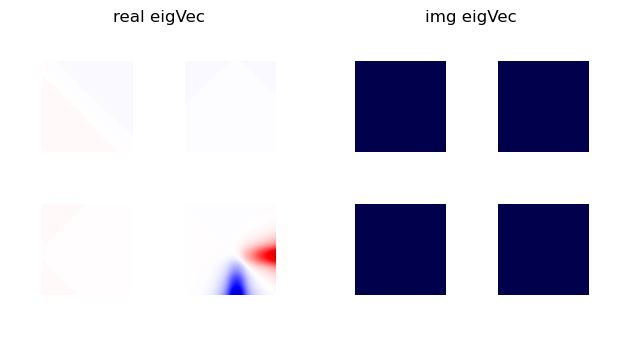

5° Eigen Value = (0.9598094874495425+0j)


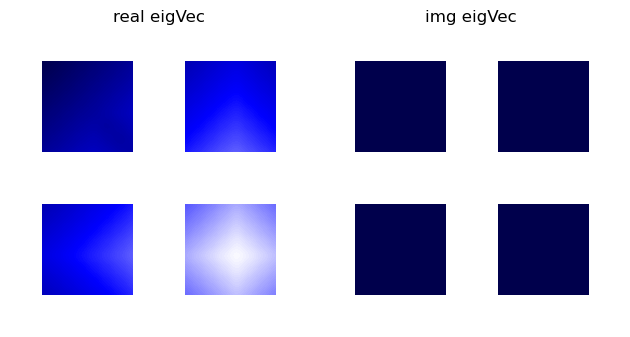

6° Eigen Value = (0.5758614324111834+0j)


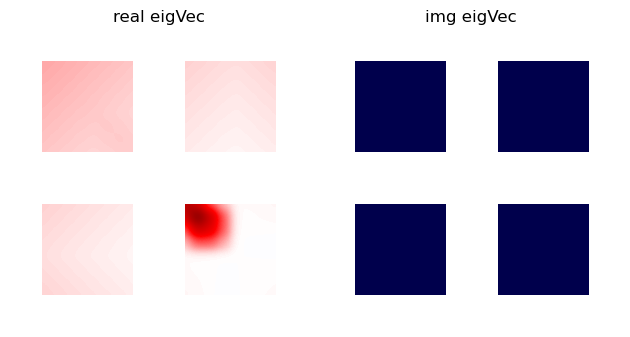

7° Eigen Value = (0.574463826422894+0j)


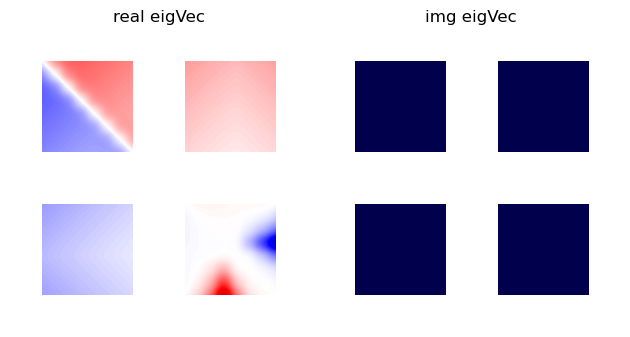

8° Eigen Value = (0.5743770017373062+0.00011260297443705048j)


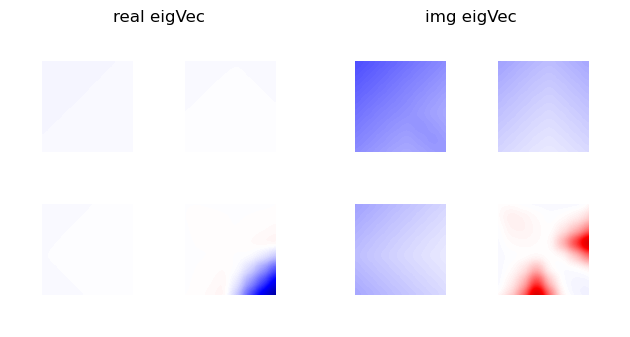

9° Eigen Value = (0.5743770017373062-0.00011260297443705048j)


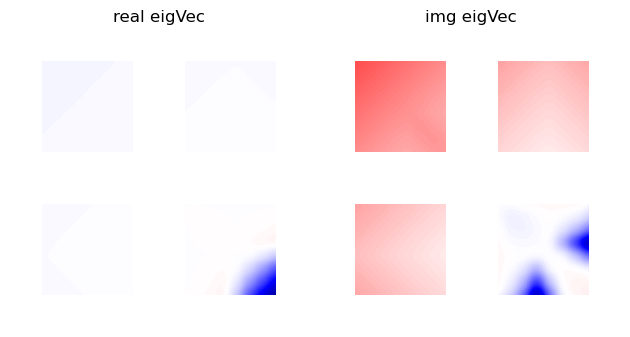

10° Eigen Value = (0.5725406346097873+0j)


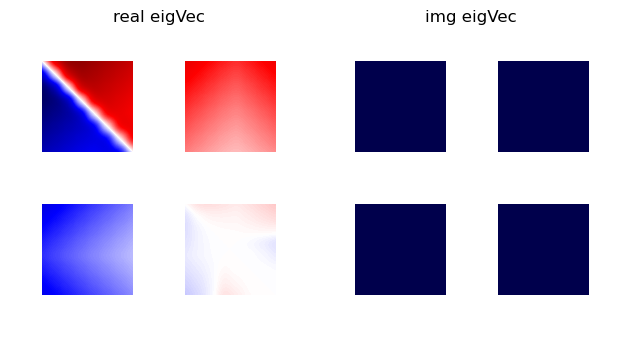

11° Eigen Value = (0.5725251390590027+0j)


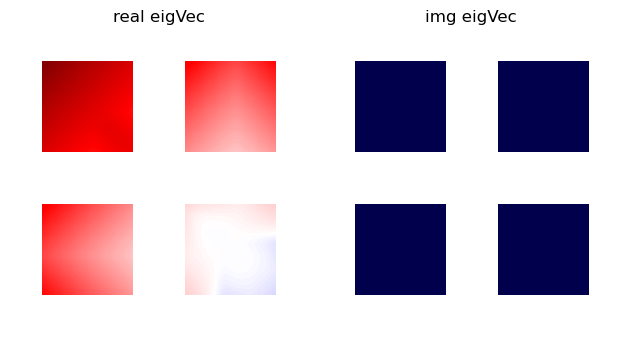

12° Eigen Value = (0.5700418896075883+0j)


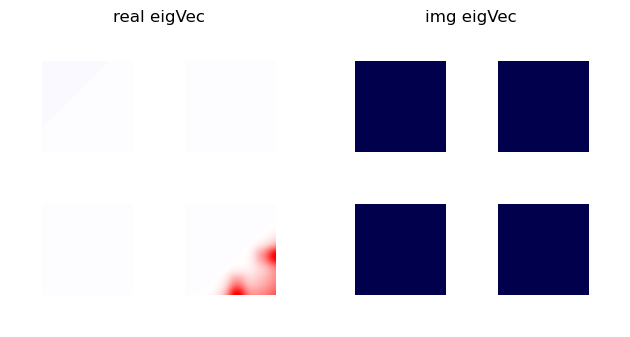

13° Eigen Value = (0.5698977975462992+0j)


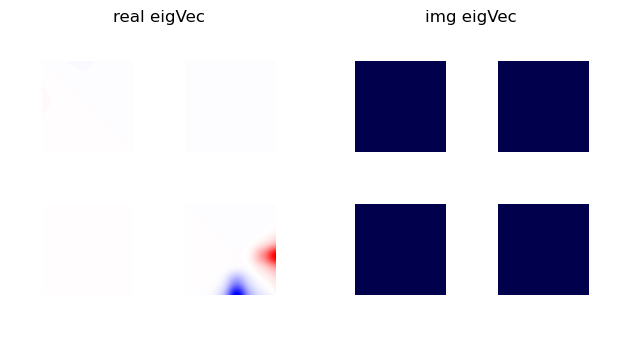

14° Eigen Value = (0.36704520247516426+0j)


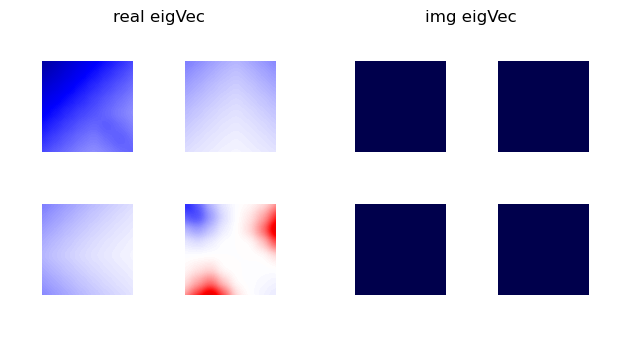

15° Eigen Value = (0.3670344813965231+0j)


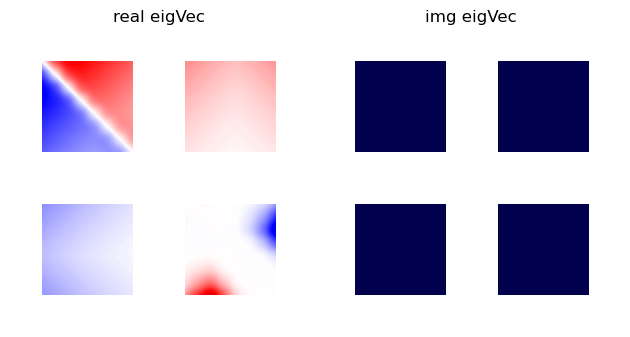

16° Eigen Value = (0.36696980076806307+0j)


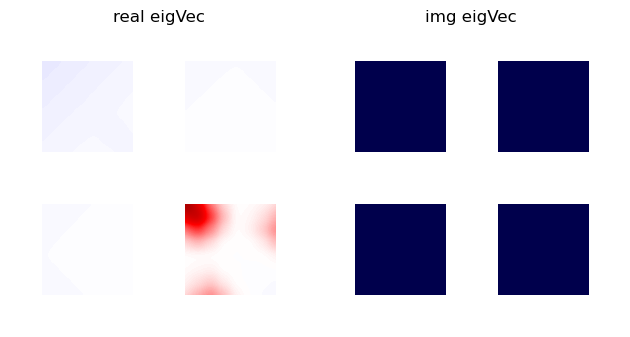

17° Eigen Value = (0.36572382345195764+0j)


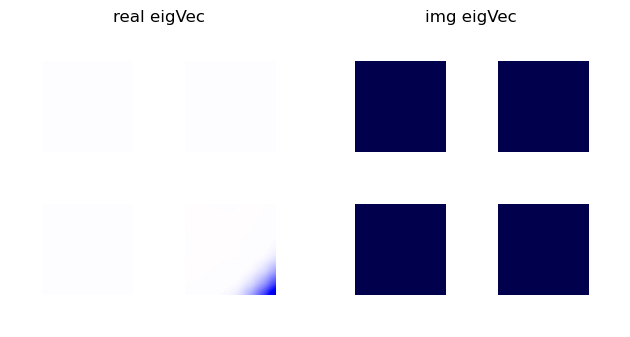

18° Eigen Value = (0.3645966947830856+0j)


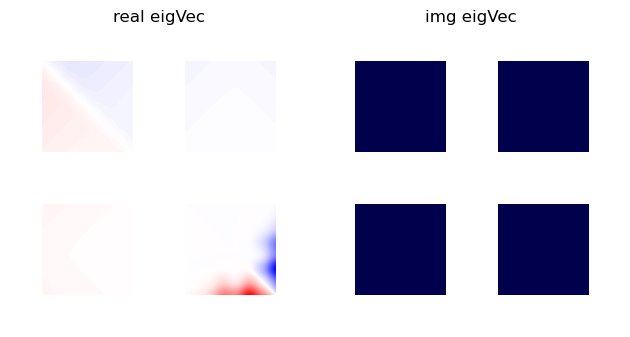

19° Eigen Value = (0.3644755693707143+3.1722748109690984e-06j)


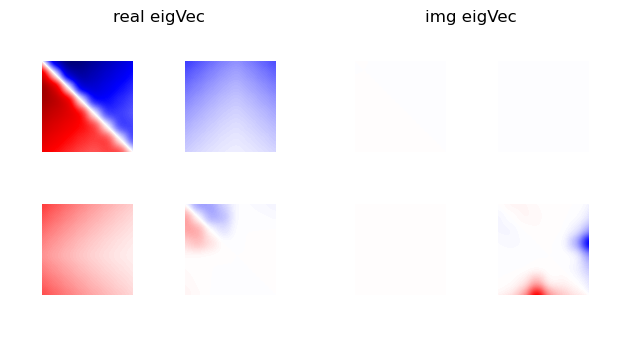

20° Eigen Value = (0.3644755693707143-3.1722748109690984e-06j)


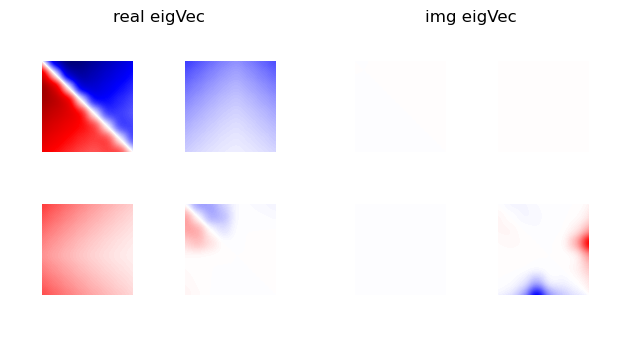

In [220]:
# Compute the gradient
sr2 = SR2(gpp)

# Sum over actions and normalize
P_s2s = np.sum(world.P, axis=1)
P_s2s = P_s2s / np.sum(P_s2s, axis=1) 

plt.imshow(sr2, cmap='seismic', vmin=-np.max(np.abs(sr2)), vmax=np.max(np.abs(sr2)))
plt.title("SR^2 in s0 remapped into [state * state]")
plt.tight_layout()
plt.show()

plot_eigenvalues(sr2, 20)